In [27]:
import numpy as np
import pandas as pd

from finefood import utils
from finefood import score_model
from finefood import preprocessing

from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, TensorBoard

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./data/Reviews.csv").set_index("Id")
df = df.sample(n=1000)

In [3]:
word_to_index, index_to_word, word_to_vec_map = utils.read_glove_vecs("./data/glove.6B/glove.6B.50d.txt")
corpus = word_to_index.keys()

In [4]:
len(corpus)

400000

In [5]:
clean_texts = np.array([preprocessing.clean_text(t, corpus) for t in df.Text])
scores = df.Score.values

In [6]:
for score, text in zip(scores[:5], clean_texts):
    print(score, text)

5 love cherry pie lara best tasty bar sugar bar diabetics low sugar carbs
5 melitta cafe collection blanc et noir coffee refined notice soon open aroma translates well throughout brewing process remains poured taste find flavor bold yet slightly powerful flavor without coarseness went directly one high pressure coffee pod brewing systems using melitta seems melitta helped find way back better cup
5 girls absolutely loved heaven get enough tasty bit pricey since cats pack went super fast giving treat
5 vendor fast tea simply best way relax great tasting highly recommend
5 update lot happen couple last two cases ordered amazon whole artichoke leaves several cans small soft leaves near talking big tough artichoke brown spots many poor contacted amazon first time replaced case quality much second time asked refund two times couple months also contacted reese doubted asked sending two cans told gladly send cans would impression reese changed much longer buy review tried every brand love buy

In [7]:
maxLen = 10

In [8]:
scores_oh = np_utils.to_categorical(scores)[:, 1:]
text_indices = preprocessing.sentences_to_indices(clean_texts, word_to_index, maxLen)
X_train, X_test, y_train, y_test = train_test_split(text_indices, scores_oh, test_size=.2)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 10), (200, 10), (800, 5), (200, 5))

In [10]:
model = score_model.build_model((maxLen,), word_to_vec_map, word_to_index)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
__________

In [19]:

def train_model(model, X_train, X_test, y_train, y_test, **kwargs):
    filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, 
                                 monitor='val_acc', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='max')
    tensorboard = TensorBoard(log_dir='./logs', 
                              histogram_freq=0, 
                              batch_size=kwargs.get("batch_size", 32), 
                              write_graph=True)

    callbacks = [checkpoint, tensorboard]

    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test), 
                        callbacks=callbacks, 
                        **kwargs)

    return history

In [29]:
history = train_model(model, X_train, X_test, y_train, y_test, epochs = 2, batch_size = 32, shuffle=True)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 7s 9ms/step - loss: 1.2686 - acc: 0.6362 - val_loss: 1.3148 - val_acc: 0.5900

Epoch 00001: val_acc improved from -inf to 0.59000, saving model to weights-improvement-01-0.59.hdf5
Epoch 2/10
800/800 [==============================] - 7s 9ms/step - loss: 1.2686 - acc: 0.6362 - val_loss: 1.3148 - val_acc: 0.5900

Epoch 00002: val_acc did not improve from 0.59000
Epoch 3/10
800/800 [==============================] - 7s 9ms/step - loss: 1.2686 - acc: 0.6362 - val_loss: 1.3148 - val_acc: 0.5900

Epoch 00003: val_acc did not improve from 0.59000
Epoch 4/10
800/800 [==============================] - 7s 9ms/step - loss: 1.2686 - acc: 0.6362 - val_loss: 1.3148 - val_acc: 0.5900

Epoch 00004: val_acc did not improve from 0.59000
Epoch 5/10
800/800 [==============================] - 7s 9ms/step - loss: 1.2686 - acc: 0.6362 - val_loss: 1.3148 - val_acc: 0.5900

Epoch 00005: val_acc did not improve f

In [30]:
hist_df = pd.DataFrame(history.history)

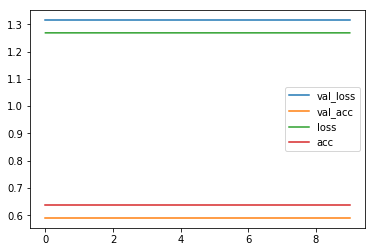

In [45]:
hist_df.plot()

In [39]:
hist_df

,val_loss,val_acc,loss,acc
0,1.314833,0.59,1.268594,0.63625
1,1.314833,0.59,1.268590,0.63625
2,1.314833,0.59,1.268588,0.63625
3,1.314833,0.59,1.268586,0.63625
4,1.314833,0.59,1.268587,0.63625
5,1.314833,0.59,1.268587,0.63625
6,1.314833,0.59,1.268584,0.63625
7,1.314833,0.59,1.268586,0.63625
8,1.314833,0.59,1.268587,0.63625
9,1.314833,0.59,1.268587,0.63625


0.63625